In [689]:
#libraries
import numpy as np
import pandas as pd
from sklearn import impute
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [690]:
#reading the data
og_data = pd.read_csv("Insurance_claims.csv")
og_data

,PolicyholderNumber,FirstPartyVehicleNumber,ThirdPartyVehicleNumber,InsurerNotes,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,ClaimCause,ClaimInvolvedCovers,DamageImportance,...,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud,LossAndHolderPostCodeSame
0,531112,715507.0,NaN,avoids a cat and hits a garage pole With deduc...,CivilServant,02.01.19,18.06.18,CollisionWithAnimal,MaterialDamages ActLiability,NaN,...,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,0,1
1,87170,71164.0,NaN,accident only expert contacts us to inform us ...,Worker,02.01.19,29.06.17,LossOfControl,MaterialDamages ActLiability,NaN,...,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,0,0
2,98706,442609.0,NaN,ae Miss/ for garage change A/ setting up EAD/ ...,Worker,02.01.19,05.02.17,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability,NaN,...,93.0,0.25,0,998.20,18.0,32.0,0,0.5,0,1
3,38240,24604.0,NaN,"awaiting report to determine rc, no box checke...",CivilServant,02.01.19,21.01.17,AccidentWithIdentifiedThirdParty,MaterialDamages ActLiability ReplacementVehicle,NaN,...,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,0,1
4,11339,2933.0,229134.0,Insured in THIRD-PARTY formula Insured in a su...,Farmer,02.01.19,13.01.18,AccidentWithIdentifiedThirdParty,ActLiability,NaN,...,110.0,0.25,0,12.00,12.0,28.0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11525,452486,626487.0,NaN,NaN,Employee,17.02.21,15.03.19,WindscreenDamage,Windscreen,NaN,...,85.0,0.50,1,1010.23,0.0,56.0,0,0.0,0,0
11526,581104,788178.0,NaN,NaN,Employee,07.03.21,20.07.17,WindscreenDamage,Windscreen,NaN,...,119.0,0.50,1,154.35,0.0,54.0,0,0.0,0,0
11527,817231,NaN,NaN,NaN,Employee,15.03.21,30.09.20,WindscreenDamage,Windscreen,NaN,...,139.0,0.50,1,420.25,0.0,34.0,0,0.0,0,0
11528,321534,468522.0,NaN,NaN,CivilServant,06.03.21,28.12.18,WindscreenDamage,Windscreen,NaN,...,105.0,0.50,1,96.40,0.0,58.0,0,0.0,0,0


## Dropping Columns

In [691]:
#dropping columns
og_data_clean = og_data.drop(columns=['PolicyholderNumber', 'FirstPartyVehicleNumber', 
                                      'ThirdPartyVehicleNumber', 'InsurerNotes', 
                                      'DamageImportance', 'ConnectionBetweenParties', 'ClaimInvolvedCovers', 'ClaimCause' ])
og_data_clean

,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,FirstPartyVehicleType,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud,LossAndHolderPostCodeSame
0,CivilServant,02.01.19,18.06.18,Car,1,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,0,1
1,Worker,02.01.19,29.06.17,Car,0,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,0,0
2,Worker,02.01.19,05.02.17,Car,0,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,0,1
3,CivilServant,02.01.19,21.01.17,Car,0,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,0,1
4,Farmer,02.01.19,13.01.18,Car,0,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11525,Employee,17.02.21,15.03.19,Car,0,1,85.0,0.50,1,1010.23,0.0,56.0,0,0.0,0,0
11526,Employee,07.03.21,20.07.17,Car,0,3,119.0,0.50,1,154.35,0.0,54.0,0,0.0,0,0
11527,Employee,15.03.21,30.09.20,Car,0,4,139.0,0.50,1,420.25,0.0,34.0,0,0.0,0,0
11528,CivilServant,06.03.21,28.12.18,Car,0,6,105.0,0.50,1,96.40,0.0,58.0,0,0.0,0,0


# Dealing with NANs

In [692]:
#checking for NA
og_data_clean.isna().values.any()

True

In [693]:
#checking for NA in all the colummns
og_data_clean.isna().sum()

PolicyholderOccupation             343
LossDate                             0
FirstPolicySubscriptionDate          0
FirstPartyVehicleType               12
PolicyWasSubscribedOnInternet        0
NumberOfPoliciesOfPolicyholder       0
FpVehicleAgeMonths                  12
EasinessToStage                      0
ClaimWihoutIdentifiedThirdParty      0
ClaimAmount                          0
LossHour                            94
PolicyHolderAge                     36
NumberOfBodilyInjuries               0
FirstPartyLiability                  0
Fraud                                0
LossAndHolderPostCodeSame            0
dtype: int64

In [694]:
#checkikng the distribution of 'Fraud' for each column with NA based on the NA observation rows

In [695]:
data_null_policyholderOcc = og_data_clean[og_data_clean['PolicyholderOccupation'].isnull()]
data_null_policyholderOcc.Fraud.value_counts() #remove na's with 0, immpute the 1s based on knn

0    339
1      4
Name: Fraud, dtype: int64

In [696]:
#data_null_claimCause = og_data_clean[og_data_clean['ClaimCause'].isnull()]
#data_null_claimCause.Fraud.value_counts()

In [697]:
#data_null_claimInvCovers = og_data_clean[og_data_clean['ClaimInvolvedCovers'].isnull()]
#data_null_claimInvCovers.Fraud.value_counts()

In [698]:
data_null_firstPartyVehicleType = og_data_clean[og_data_clean['FirstPartyVehicleType'].isnull()]
data_null_firstPartyVehicleType.Fraud.value_counts()

0    10
1     2
Name: Fraud, dtype: int64

In [699]:
data_null_vehicleAgeMn = og_data_clean[og_data_clean['FpVehicleAgeMonths'].isnull()]
data_null_vehicleAgeMn.Fraud.value_counts()

0    10
1     2
Name: Fraud, dtype: int64

In [700]:
data_null_lossHour = og_data_clean[og_data_clean['LossHour'].isnull()]
data_null_lossHour.Fraud.value_counts()

0    93
1     1
Name: Fraud, dtype: int64

In [701]:
data_null_policyHolderAge = og_data_clean[og_data_clean['PolicyHolderAge'].isnull()]
data_null_policyHolderAge.Fraud.value_counts()

0    36
Name: Fraud, dtype: int64

## Remove na's with 0 in the Fraud column

In [702]:
index_name1 = og_data_clean[(og_data_clean['Fraud']==0) & (og_data_clean['PolicyholderOccupation'].isna())].index
og_data_clean.drop(index_name1, inplace=True)
og_data_clean

,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,FirstPartyVehicleType,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud,LossAndHolderPostCodeSame
0,CivilServant,02.01.19,18.06.18,Car,1,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,0,1
1,Worker,02.01.19,29.06.17,Car,0,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,0,0
2,Worker,02.01.19,05.02.17,Car,0,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,0,1
3,CivilServant,02.01.19,21.01.17,Car,0,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,0,1
4,Farmer,02.01.19,13.01.18,Car,0,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11525,Employee,17.02.21,15.03.19,Car,0,1,85.0,0.50,1,1010.23,0.0,56.0,0,0.0,0,0
11526,Employee,07.03.21,20.07.17,Car,0,3,119.0,0.50,1,154.35,0.0,54.0,0,0.0,0,0
11527,Employee,15.03.21,30.09.20,Car,0,4,139.0,0.50,1,420.25,0.0,34.0,0,0.0,0,0
11528,CivilServant,06.03.21,28.12.18,Car,0,6,105.0,0.50,1,96.40,0.0,58.0,0,0.0,0,0


In [703]:
#index_name2 = og_data_clean[(og_data_clean['Fraud']==0) & (og_data_clean['ClaimCause'].isna())].index
#og_data_clean.drop(index_name2, inplace=True)
#og_data_clean

In [704]:
#index_name3 = og_data_clean[(og_data_clean['Fraud']==0) & (og_data_clean['ClaimInvolvedCovers'].isna())].index
#og_data_clean.drop(index_name3, inplace=True)
#og_data_clean

In [705]:
index_name4 = og_data_clean[(og_data_clean['Fraud']==0) & (og_data_clean['FirstPartyVehicleType'].isna())].index
og_data_clean.drop(index_name4, inplace=True)
og_data_clean

,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,FirstPartyVehicleType,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud,LossAndHolderPostCodeSame
0,CivilServant,02.01.19,18.06.18,Car,1,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,0,1
1,Worker,02.01.19,29.06.17,Car,0,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,0,0
2,Worker,02.01.19,05.02.17,Car,0,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,0,1
3,CivilServant,02.01.19,21.01.17,Car,0,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,0,1
4,Farmer,02.01.19,13.01.18,Car,0,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11525,Employee,17.02.21,15.03.19,Car,0,1,85.0,0.50,1,1010.23,0.0,56.0,0,0.0,0,0
11526,Employee,07.03.21,20.07.17,Car,0,3,119.0,0.50,1,154.35,0.0,54.0,0,0.0,0,0
11527,Employee,15.03.21,30.09.20,Car,0,4,139.0,0.50,1,420.25,0.0,34.0,0,0.0,0,0
11528,CivilServant,06.03.21,28.12.18,Car,0,6,105.0,0.50,1,96.40,0.0,58.0,0,0.0,0,0


In [706]:
index_name5 = og_data_clean[(og_data_clean['Fraud']==0) & (og_data_clean['FpVehicleAgeMonths'].isna())].index
og_data_clean.drop(index_name5, inplace=True)
og_data_clean

,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,FirstPartyVehicleType,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud,LossAndHolderPostCodeSame
0,CivilServant,02.01.19,18.06.18,Car,1,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,0,1
1,Worker,02.01.19,29.06.17,Car,0,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,0,0
2,Worker,02.01.19,05.02.17,Car,0,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,0,1
3,CivilServant,02.01.19,21.01.17,Car,0,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,0,1
4,Farmer,02.01.19,13.01.18,Car,0,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11525,Employee,17.02.21,15.03.19,Car,0,1,85.0,0.50,1,1010.23,0.0,56.0,0,0.0,0,0
11526,Employee,07.03.21,20.07.17,Car,0,3,119.0,0.50,1,154.35,0.0,54.0,0,0.0,0,0
11527,Employee,15.03.21,30.09.20,Car,0,4,139.0,0.50,1,420.25,0.0,34.0,0,0.0,0,0
11528,CivilServant,06.03.21,28.12.18,Car,0,6,105.0,0.50,1,96.40,0.0,58.0,0,0.0,0,0


In [707]:
index_name6 = og_data_clean[(og_data_clean['Fraud']==0) & (og_data_clean['LossHour'].isna())].index
og_data_clean.drop(index_name6, inplace=True)
og_data_clean

,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,FirstPartyVehicleType,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud,LossAndHolderPostCodeSame
0,CivilServant,02.01.19,18.06.18,Car,1,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,0,1
1,Worker,02.01.19,29.06.17,Car,0,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,0,0
2,Worker,02.01.19,05.02.17,Car,0,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,0,1
3,CivilServant,02.01.19,21.01.17,Car,0,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,0,1
4,Farmer,02.01.19,13.01.18,Car,0,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11525,Employee,17.02.21,15.03.19,Car,0,1,85.0,0.50,1,1010.23,0.0,56.0,0,0.0,0,0
11526,Employee,07.03.21,20.07.17,Car,0,3,119.0,0.50,1,154.35,0.0,54.0,0,0.0,0,0
11527,Employee,15.03.21,30.09.20,Car,0,4,139.0,0.50,1,420.25,0.0,34.0,0,0.0,0,0
11528,CivilServant,06.03.21,28.12.18,Car,0,6,105.0,0.50,1,96.40,0.0,58.0,0,0.0,0,0


In [708]:
index_name7 = og_data_clean[(og_data_clean['Fraud']==0) & (og_data_clean['PolicyHolderAge'].isna())].index
og_data_clean.drop(index_name7, inplace=True)
og_data_clean

,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,FirstPartyVehicleType,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud,LossAndHolderPostCodeSame
0,CivilServant,02.01.19,18.06.18,Car,1,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,0,1
1,Worker,02.01.19,29.06.17,Car,0,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,0,0
2,Worker,02.01.19,05.02.17,Car,0,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,0,1
3,CivilServant,02.01.19,21.01.17,Car,0,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,0,1
4,Farmer,02.01.19,13.01.18,Car,0,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11525,Employee,17.02.21,15.03.19,Car,0,1,85.0,0.50,1,1010.23,0.0,56.0,0,0.0,0,0
11526,Employee,07.03.21,20.07.17,Car,0,3,119.0,0.50,1,154.35,0.0,54.0,0,0.0,0,0
11527,Employee,15.03.21,30.09.20,Car,0,4,139.0,0.50,1,420.25,0.0,34.0,0,0.0,0,0
11528,CivilServant,06.03.21,28.12.18,Car,0,6,105.0,0.50,1,96.40,0.0,58.0,0,0.0,0,0


In [709]:
og_data_clean.isna().sum() #remaining nan that have 'Fraud' = 1

PolicyholderOccupation             4
LossDate                           0
FirstPolicySubscriptionDate        0
FirstPartyVehicleType              2
PolicyWasSubscribedOnInternet      0
NumberOfPoliciesOfPolicyholder     0
FpVehicleAgeMonths                 2
EasinessToStage                    0
ClaimWihoutIdentifiedThirdParty    0
ClaimAmount                        0
LossHour                           1
PolicyHolderAge                    0
NumberOfBodilyInjuries             0
FirstPartyLiability                0
Fraud                              0
LossAndHolderPostCodeSame          0
dtype: int64

In [710]:
#og_data_clean.PolicyholderOccupation.unique()
#x = {"CivilServant":1,"Worker":2,"Farmer":3,"Employee":4,"Executive":5,"Merchant":6,"Retired":7,"Student":8,"Unemployed":9,"SelfEmployed":10,"HeadOfCompany":11}


In [711]:
#og_data_clean["PolicyholderOccupation"].replace(x,inplace=True)
#og_data_clean

In [712]:
#og_data_clean.FirstPartyVehicleType.unique()
#y = {"Car":1,"Motorcycle":2,"Caravan":3,"PrivateCar":4}

In [713]:

#og_data_clean["FirstPartyVehicleType"].replace(y,inplace=True)
#og_data_clean

 Transformation of datetime object

In [714]:
og_data_clean['LossDate'] = pd.to_datetime(og_data_clean['LossDate'])
og_data_clean['FirstPolicySubscriptionDate'] = pd.to_datetime(og_data_clean['FirstPolicySubscriptionDate'])
og_data_clean

,PolicyholderOccupation,LossDate,FirstPolicySubscriptionDate,FirstPartyVehicleType,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,Fraud,LossAndHolderPostCodeSame
0,CivilServant,2019-02-01,2018-06-18,Car,1,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,0,1
1,Worker,2019-02-01,2017-06-29,Car,0,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,0,0
2,Worker,2019-02-01,2017-05-02,Car,0,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,0,1
3,CivilServant,2019-02-01,2017-01-21,Car,0,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,0,1
4,Farmer,2019-02-01,2018-01-13,Car,0,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11525,Employee,2021-02-17,2019-03-15,Car,0,1,85.0,0.50,1,1010.23,0.0,56.0,0,0.0,0,0
11526,Employee,2021-07-03,2017-07-20,Car,0,3,119.0,0.50,1,154.35,0.0,54.0,0,0.0,0,0
11527,Employee,2021-03-15,2020-09-30,Car,0,4,139.0,0.50,1,420.25,0.0,34.0,0,0.0,0,0
11528,CivilServant,2021-06-03,2018-12-28,Car,0,6,105.0,0.50,1,96.40,0.0,58.0,0,0.0,0,0


In [715]:
#ordinal encoding of categorical variables
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
#og_data_clean[['ClaimInvolvedCovers']] = enc.fit_transform(og_data_clean[['ClaimInvolvedCovers']])
#og_data_clean[['ClaimCause']] = enc.fit_transform(og_data_clean[['ClaimCause']])
og_data_clean[["PolicyholderOccupation"]] = enc.fit_transform(og_data_clean[["PolicyholderOccupation"]])
og_data_clean[["FirstPartyVehicleType"]] = enc.fit_transform(og_data_clean[["FirstPartyVehicleType"]])

In [716]:
og_data_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
PolicyholderOccupation,11086.0,3.332852,3.316527,0.0,1.0000,1.00,6.000,10.0
FirstPartyVehicleType,11088.0,0.054473,0.259934,0.0,0.0000,0.00,0.000,3.0
PolicyWasSubscribedOnInternet,11090.0,0.183589,0.387166,0.0,0.0000,0.00,0.000,1.0
NumberOfPoliciesOfPolicyholder,11090.0,2.240126,1.679838,1.0,1.0000,2.00,3.000,18.0
FpVehicleAgeMonths,11088.0,113.520924,73.729579,-4.0,52.0000,108.00,162.000,652.0
EasinessToStage,11090.0,0.376664,0.139826,0.0,0.2500,0.50,0.500,0.5
ClaimWihoutIdentifiedThirdParty,11090.0,0.682236,0.465628,0.0,0.0000,1.00,1.000,1.0
ClaimAmount,11090.0,1412.494998,2678.747095,0.0,302.3425,764.82,1499.925,64696.0
LossHour,11089.0,8.262152,7.401938,0.0,0.0000,9.00,15.000,23.0
PolicyHolderAge,11090.0,44.799279,15.256934,18.0,32.0000,43.00,56.000,90.0


Feature Engineering: Replacing Loss Date and FirstPolicySubscriptionsDate with DaysSinceSubs i.e. number of days after subscription the loss happened

In [717]:
LossDateArr = list(og_data_clean['LossDate'])
FPSArr = list(og_data_clean['FirstPolicySubscriptionDate'])
DaysSinceSubs = [(LossDateArr[i]-FPSArr[i]).days for i in range(len(LossDateArr))]

og_data_clean['LossAfterSubs_Days'] = DaysSinceSubs

In [718]:
og_data_clean.drop(columns=['LossDate', 'FirstPolicySubscriptionDate'], inplace=True)

In [719]:
og_data_clean.reset_index(drop=True,inplace=True)


In [720]:
X=og_data_clean.copy()
X.drop(columns=['Fraud'],inplace=True)


In [721]:
y = og_data_clean['Fraud']

Splitting and scaling the dataset with imputations for NA observations belongting to class 1

In [722]:
X_train, X_other, y_train, y_other = train_test_split(X, y , train_size=0.7, random_state=461,stratify=y)
X_test, X_valid, y_test, y_valid = train_test_split(X_other, y_other, train_size = 0.5, random_state=391,stratify=y_other)

In [723]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(7762, 14)
(1664, 14)
(1664, 14)
(7762,)
(1664,)
(1664,)


In [724]:
from sklearn.preprocessing import MinMaxScaler


In [725]:
scaler = MinMaxScaler() 
scaler.fit(X_train)    # Only the training data are used to fit the scaler transformation,
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)  # then the scaler is used to transform the test input data.
X_valid_scaled = scaler.transform(X_valid)

#### Q6: Preprocessing for the AUTOENCODER


In [726]:
y[y==1].index #anomolous class
y[y==0].index #normal class
X

,PolicyholderOccupation,FirstPartyVehicleType,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,LossAndHolderPostCodeSame,LossAfterSubs_Days
0,0.0,0.0,1,1,104.0,0.25,1,4624.73,8.0,45.0,0,1.0,1,228
1,10.0,0.0,0,3,230.0,0.50,1,1606.81,11.0,20.0,0,1.0,0,582
2,10.0,0.0,0,9,93.0,0.25,0,998.20,18.0,32.0,0,0.5,1,640
3,0.0,0.0,0,2,56.0,0.25,0,2506.92,11.0,46.0,0,0.5,1,741
4,3.0,0.0,0,4,110.0,0.25,0,12.00,12.0,28.0,0,0.0,0,384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11085,1.0,0.0,0,1,85.0,0.50,1,1010.23,0.0,56.0,0,0.0,0,705
11086,1.0,0.0,0,3,119.0,0.50,1,154.35,0.0,54.0,0,0.0,0,1444
11087,1.0,0.0,0,4,139.0,0.50,1,420.25,0.0,34.0,0,0.0,0,166
11088,0.0,0.0,0,6,105.0,0.50,1,96.40,0.0,58.0,0,0.0,0,888


In [727]:
X_anom=X.iloc[y[y==1].index,:]#.reset_index(inplace=True) #anomolous observations -- split this into half to put into test and validation
X_nom=X.iloc[y[y==0].index,:]#.reset_index(inplace=True) #normal observations -- split this into training, test, and validaiton


In [728]:
X_train_auto, X_other, y_train_auto, y_other = train_test_split(X_nom, y[y==0], test_size=0.3, stratify=y[y==0])
X_valid1, X_test1, y_valid1, y_test1 = train_test_split(X_other, y_other, test_size=0.5, stratify=y_other)

In [729]:
print(len(X_train_auto), len(y_train_auto), len(X_other), len(y_other))

7682 7682 3293 3293


In [730]:
print(len(X_train_auto), len(y_train_auto), len(X_valid1), len(y_valid1), len(X_test1), len(y_test1))

7682 7682 1646 1646 1647 1647


In [731]:
X_valid2, X_test2, y_valid2, y_test2 = train_test_split(X_anom, y[y==1], test_size=0.5, stratify=y[y==1])


In [732]:
print(len(X_valid2), len(y_valid2), len(X_test2), len(y_test2))

57 57 58 58


In [733]:
y_test_auto = pd.concat([y_test1, y_test2],ignore_index=True)
y_valid_auto = pd.concat([y_valid1, y_valid2],ignore_index=True)
X_test_auto = pd.concat([X_test1, X_test2],ignore_index=True)
X_valid_auto = pd.concat([X_valid1, X_valid2],ignore_index=True)

In [734]:
#scaling autoencoder data
X_train_auto_scaled = scaler.transform(X_train_auto) 
X_test_auto_scaled = scaler.transform(X_test_auto)  # then the scaler is used to transform the test input data.
X_valid_auto_scaled = scaler.transform(X_valid_auto)

In [735]:
#imputation for NA 
imputer = impute.KNNImputer(missing_values = np.NaN)
imputer.fit(X_train_scaled)
X_train_scaled = imputer.transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)
X_valid_scaled = imputer.transform(X_valid_scaled)

In [736]:
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)
y_valid.reset_index(drop=True,inplace=True)

In [737]:
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)

X_valid_df = pd.DataFrame(X_valid_scaled, columns=X_train.columns)

In [738]:
#imputation for NA (autoencoder data)
X_train_auto_scaled = imputer.transform(X_train_auto_scaled)
X_test_auto_scaled = imputer.transform(X_test_auto_scaled)
X_valid_auto_scaled = imputer.transform(X_valid_auto_scaled)

In [739]:
X_train_auto

,PolicyholderOccupation,FirstPartyVehicleType,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,LossAndHolderPostCodeSame,LossAfterSubs_Days
3346,1.0,0.0,1,1,12.0,0.25,1,0.00,0.0,37.0,0,0.0,1,385
1383,0.0,1.0,0,2,142.0,0.25,0,0.00,18.0,53.0,0,1.0,0,259
9202,0.0,0.0,1,5,83.0,0.50,1,1074.07,15.0,55.0,0,0.0,0,756
3368,0.0,0.0,0,1,31.0,0.50,1,20733.00,5.0,38.0,0,1.0,0,848
2965,1.0,0.0,0,1,135.0,0.25,0,2984.42,20.0,40.0,0,0.0,1,107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8973,1.0,0.0,0,2,76.0,0.50,1,602.96,9.0,52.0,0,0.0,0,606
2622,1.0,0.0,0,1,75.0,0.50,1,2990.59,14.0,41.0,0,1.0,1,384
310,1.0,0.0,0,4,278.0,0.50,1,1073.92,0.0,53.0,0,0.0,0,102
3040,3.0,0.0,1,2,248.0,0.25,0,2964.00,22.0,25.0,0,1.0,0,113


In [740]:
X_trainAuto_df = pd.DataFrame(X_train_auto_scaled, columns=X_train_auto.columns)

X_testAuto_df = pd.DataFrame(X_test_auto_scaled, columns=X_train_auto.columns)

X_validAuto_df = pd.DataFrame(X_valid_auto_scaled, columns=X_train_auto.columns)

In [741]:
X_trainAuto_df.corr()

,PolicyholderOccupation,FirstPartyVehicleType,PolicyWasSubscribedOnInternet,NumberOfPoliciesOfPolicyholder,FpVehicleAgeMonths,EasinessToStage,ClaimWihoutIdentifiedThirdParty,ClaimAmount,LossHour,PolicyHolderAge,NumberOfBodilyInjuries,FirstPartyLiability,LossAndHolderPostCodeSame,LossAfterSubs_Days
PolicyholderOccupation,1.000000,0.066141,-0.038250,0.062627,0.025648,0.007526,0.015495,-0.008403,0.009779,0.183701,-0.014566,0.018789,0.020322,-0.005760
FirstPartyVehicleType,0.066141,1.000000,-0.097404,-0.029288,0.004779,0.032245,0.062476,0.019596,-0.022401,0.105987,0.029179,0.033017,0.010065,-0.019968
PolicyWasSubscribedOnInternet,-0.038250,-0.097404,1.000000,-0.193308,-0.004229,-0.069419,-0.073972,-0.006438,0.021365,-0.110097,0.009414,0.008562,0.062461,-0.173588
NumberOfPoliciesOfPolicyholder,0.062627,-0.029288,-0.193308,1.000000,0.030869,0.020777,0.045786,-0.030967,0.007419,-0.042771,0.013372,-0.019948,-0.015512,0.210177
FpVehicleAgeMonths,0.025648,0.004779,-0.004229,0.030869,1.000000,-0.022707,-0.080804,-0.097448,-0.051425,-0.097974,0.031292,0.007049,0.001637,0.020999
EasinessToStage,0.007526,0.032245,-0.069419,0.020777,-0.022707,1.000000,0.707637,-0.182441,-0.450602,0.056567,-0.384543,-0.173616,0.050654,0.052718
ClaimWihoutIdentifiedThirdParty,0.015495,0.062476,-0.073972,0.045786,-0.080804,0.707637,1.000000,-0.157322,-0.404913,0.027379,-0.141590,-0.261620,0.095058,0.055557
ClaimAmount,-0.008403,0.019596,-0.006438,-0.030967,-0.097448,-0.182441,-0.157322,1.000000,0.163340,0.017719,0.185638,0.247336,-0.027296,-0.052544
LossHour,0.009779,-0.022401,0.021365,0.007419,-0.051425,-0.450602,-0.404913,0.163340,1.000000,0.000091,0.071505,0.248306,-0.025535,-0.021781
PolicyHolderAge,0.183701,0.105987,-0.110097,-0.042771,-0.097974,0.056567,0.027379,0.017719,0.000091,1.000000,-0.026982,0.061474,0.065767,0.062078


In [742]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### Base Autoencoder

Trying a basic autoencoder with 16,10,5,10,16 configuration

In [743]:
tf.keras.backend.clear_session()
np.random.seed(672)
tf.random.set_seed(323)

In [744]:
#encoder
encoder = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu',input_shape=(14,)),
    tf.keras.layers.Dense(5, activation="relu")
    ])

In [745]:
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                150       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
Total params: 205
Trainable params: 205
Non-trainable params: 0
_________________________________________________________________


In [746]:
#decoder
decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu',input_shape=(5,)),
    tf.keras.layers.Dense(14, activation='sigmoid')
    
])

In [747]:
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                60        
                                                                 
 dense_3 (Dense)             (None, 14)                154       
                                                                 
Total params: 214
Trainable params: 214
Non-trainable params: 0
_________________________________________________________________


In [748]:
autoencoder = tf.keras.Sequential([encoder,decoder])

In [749]:
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 5)                 205       
                                                                 
 sequential_1 (Sequential)   (None, 14)                214       
                                                                 
Total params: 419
Trainable params: 419
Non-trainable params: 0
_________________________________________________________________


In [750]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [751]:
auto_fitted=autoencoder.fit(x=X_trainAuto_df, y=X_trainAuto_df,
                epochs=100,
                validation_data=(X_validAuto_df, X_validAuto_df))

Epoch 1/100
241/241 [==============================] - 0s 986us/step - loss: 0.1194 - val_loss: 0.0783
Epoch 2/100
241/241 [==============================] - 0s 664us/step - loss: 0.0686 - val_loss: 0.0597
Epoch 3/100
241/241 [==============================] - 0s 616us/step - loss: 0.0532 - val_loss: 0.0489
Epoch 4/100
241/241 [==============================] - 0s 645us/step - loss: 0.0458 - val_loss: 0.0439
Epoch 5/100
241/241 [==============================] - 0s 979us/step - loss: 0.0424 - val_loss: 0.0412
Epoch 6/100
241/241 [==============================] - 0s 1ms/step - loss: 0.0398 - val_loss: 0.0384
Epoch 7/100
241/241 [==============================] - 0s 648us/step - loss: 0.0368 - val_loss: 0.0353
Epoch 8/100
241/241 [==============================] - 0s 635us/step - loss: 0.0339 - val_loss: 0.0326
Epoch 9/100
241/241 [==============================] - 0s 629us/step - loss: 0.0318 - val_loss: 0.0309
Epoch 10/100
241/241 [==============================] - 0s 629us/step - los

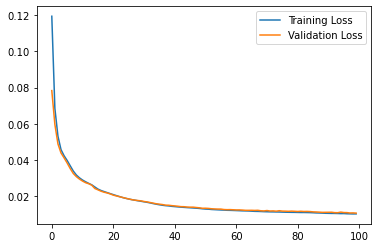

In [752]:
auto_fitted.history
plt.plot(auto_fitted.history["loss"], label="Training Loss")
plt.plot(auto_fitted.history["val_loss"], label="Validation Loss")
plt.legend()

In [753]:
auto_trainPreds = autoencoder.predict(X_trainAuto_df)
mse_train = np.mean((auto_trainPreds-X_trainAuto_df)**2, axis=1)
rec_errTrain = pd.DataFrame({'ReconstructionError':mse_train, 'TrueClass':y_train_auto })
print(mse_train.mean(), mse_train.std())
#mean and standard deviation of training set reconstruction errors to understand where the values are concentrated.

0.010208547826266174 0.011263006280821242


In [754]:
sd_1 = mse_train.mean() + mse_train.std()
sd_1p5 = mse_train.mean() + 1.5*mse_train.std()
sd_2 = mse_train.mean() + 2*mse_train.std() 
sd_3 = mse_train.mean() + 3*mse_train.std() 
print(sd_1, sd_1p5, sd_2, sd_3) #(0.06 is far from  2 standard deviations - much closer to 3) 
                                #However, classification can be tried using these 4 levels of standard deviation.

0.021471554107087416 0.027103057247498036 0.03273456038790866 0.0439975666687299


In [755]:
#validaiton reconstruction errors and histogram 
auto_validPreds = autoencoder.predict(X_validAuto_df)
mse_validation = np.mean((auto_validPreds-X_validAuto_df)**2, axis=1)
rec_errValid = pd.DataFrame({'ReconstructionError':mse_validation, 'TrueClass':y_valid_auto })

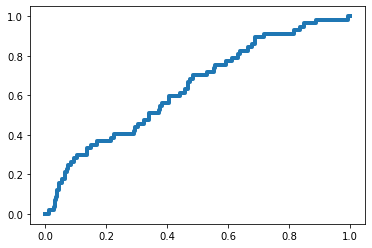

In [756]:
#Validation ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_valid_auto,mse_validation)
plt.plot(fpr, tpr, linewidth=4)
plt.show()

In [757]:
roc_auc_score(y_valid_auto,mse_validation) #AUC of validation set 

0.6398499285881776

1600 46 56 1


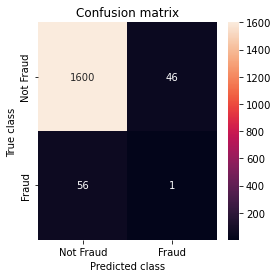

In [758]:
#Threshold of 3 SD
Valid_predClass = np.where(mse_validation > sd_3, 1, 0) #choosing the threshold from mean and standard deviation of training reconstruction errors
cm = confusion_matrix(y_valid_auto,Valid_predClass)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
print(TN, FP, FN, TP)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, xticklabels=('Not Fraud', 'Fraud'), yticklabels=('Not Fraud', 'Fraud'), annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

1491 155 42 15


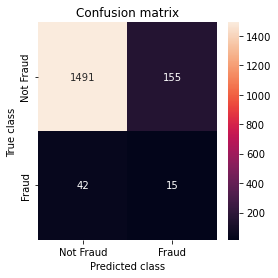

In [759]:
#Threshold of 1SD
Valid_predClass = np.where(mse_validation > sd_1, 1, 0) #choosing the threshold from mean and standard deviation of training reconstruction errors
cm = confusion_matrix(y_valid_auto,Valid_predClass)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
print(TN, FP, FN, TP)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, xticklabels=('Not Fraud', 'Fraud'), yticklabels=('Not Fraud', 'Fraud'), annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

According to the confusion matrices:
Whilst decreasing the threshold has identified higher number of True Fraud cases, this came at a cost of poorly identifying True Positives. 
More people have been labelled as Fraud this seems to indicate that both the classes are around similar error values because if Fraud errors were on the far extreme, a lower threshold would have worked and fewer False Positives would have occured.  

In [760]:
#Test reconstruction
auto_testPreds = autoencoder.predict(X_testAuto_df)
mse_test=np.mean((auto_testPreds-X_testAuto_df)**2, axis=1)
rec_errTest = pd.DataFrame({'ReconstructionError':mse_test, 'TrueClass':y_test_auto })
test_err_notFraud=rec_errTest[rec_errTest['TrueClass']==0]
test_err_Fraud=rec_errTest[rec_errTest['TrueClass']==1]


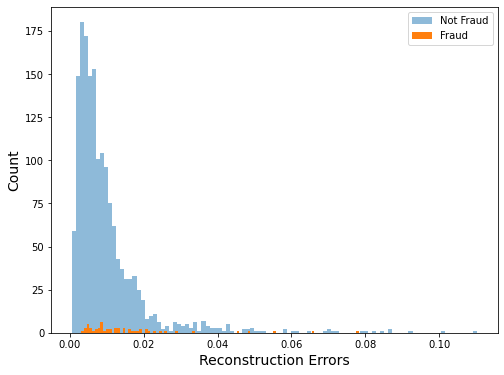

In [761]:
plt.figure(figsize=(8,6))
plt.hist(test_err_notFraud['ReconstructionError'], bins=100, alpha=0.5, label='Not Fraud')
plt.hist(test_err_Fraud['ReconstructionError'], bins=100, label='Fraud')
plt.xlabel("Reconstruction Errors", size=14)
plt.ylabel("Count", size=14)
plt.legend(loc='upper right')

#most of the fraud values cases reconstruction errors well within the range of not fraud cases. 
#The autoencoder has so far not been able to well distinguish between anomalies. It needs to be improved. 
#Deciding a higher threshold is classifying many fraud cases as not fraud because those fraud cases are showing similar reconstruction error as non fraud.
#This could either mean the fraud claims do not have anomolus features or the fraudsters play well or it could mean the autoencoder has not picked up those nuances and needs better learning techniques. 
#This can be verified using confusion matrix

<AxesSubplot:xlabel='ReconstructionError', ylabel='Count'>

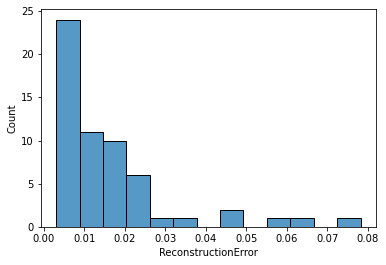

In [762]:
sns.histplot(data=rec_errTest[rec_errTest['TrueClass']==1], x='ReconstructionError')

<AxesSubplot:xlabel='ReconstructionError', ylabel='Count'>

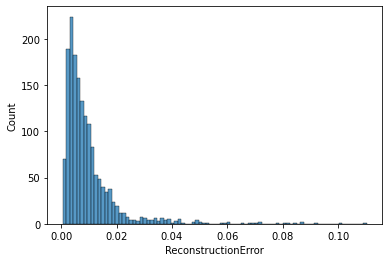

In [763]:
sns.histplot(data=rec_errTest[rec_errTest['TrueClass']==0], x='ReconstructionError')

### Trying to improve autoencoder by adding layers

In [764]:
tf.keras.backend.clear_session()
np.random.seed(672)
tf.random.set_seed(323)

#encoder
encoder = tf.keras.Sequential([
    tf.keras.layers.Dense(11, activation='relu',input_shape=(14,)), #Adding layers
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(2, activation="relu")])
#decoder
decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='relu',input_shape=(2,)),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(11, activation='relu'),
    tf.keras.layers.Dense(14, activation="sigmoid")])

autoencoder = tf.keras.Sequential([encoder,decoder])
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
auto_fitted=autoencoder.fit(x=X_trainAuto_df, y=X_trainAuto_df,
                epochs=100,
                validation_data=(X_validAuto_df, X_validAuto_df))



Epoch 1/100
241/241 [==============================] - 1s 1ms/step - loss: 0.1235 - val_loss: 0.0773
Epoch 2/100
241/241 [==============================] - 0s 794us/step - loss: 0.0694 - val_loss: 0.0629
Epoch 3/100
241/241 [==============================] - 0s 823us/step - loss: 0.0598 - val_loss: 0.0583
Epoch 4/100
241/241 [==============================] - 0s 1ms/step - loss: 0.0551 - val_loss: 0.0508
Epoch 5/100
241/241 [==============================] - 0s 956us/step - loss: 0.0455 - val_loss: 0.0423
Epoch 6/100
241/241 [==============================] - 0s 790us/step - loss: 0.0399 - val_loss: 0.0380
Epoch 7/100
241/241 [==============================] - 0s 783us/step - loss: 0.0368 - val_loss: 0.0358
Epoch 8/100
241/241 [==============================] - 0s 799us/step - loss: 0.0347 - val_loss: 0.0338
Epoch 9/100
241/241 [==============================] - 0s 790us/step - loss: 0.0330 - val_loss: 0.0321
Epoch 10/100
241/241 [==============================] - 0s 813us/step - loss:

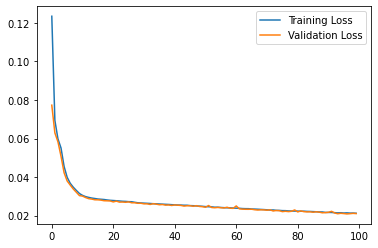

In [765]:
auto_fitted.history
plt.plot(auto_fitted.history["loss"], label="Training Loss")
plt.plot(auto_fitted.history["val_loss"], label="Validation Loss")
plt.legend()

In [766]:
#validaiton reconstruction errors and histogram 
auto_validPreds = autoencoder.predict(X_validAuto_df)
mse_validation = np.mean((auto_validPreds-X_validAuto_df)**2, axis=1)
rec_errValid = pd.DataFrame({'ReconstructionError':mse_validation, 'TrueClass':y_valid_auto })

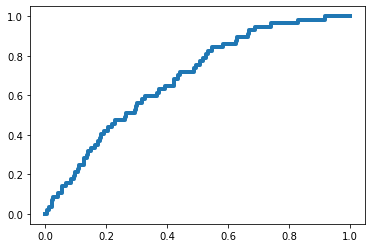

0.6857346890921105

In [767]:
#Validation ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_valid_auto,mse_validation)
plt.plot(fpr, tpr, linewidth=4)
plt.show()
roc_auc_score(y_valid_auto,mse_validation) #AUC of validation set 

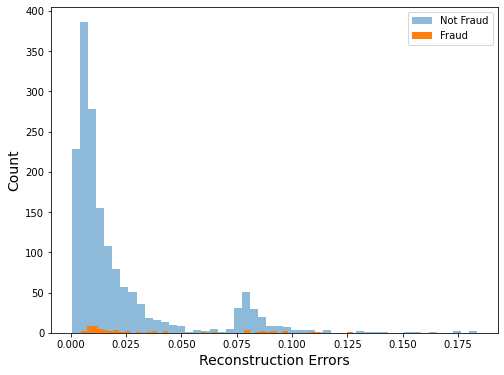

In [768]:
#Test reconstruction
auto_testPreds = autoencoder.predict(X_testAuto_df)
mse_test=np.mean((auto_testPreds-X_testAuto_df)**2, axis=1)
rec_errTest = pd.DataFrame({'ReconstructionError':mse_test, 'TrueClass':y_test_auto })
test_err_notFraud=rec_errTest[rec_errTest['TrueClass']==0]
test_err_Fraud=rec_errTest[rec_errTest['TrueClass']==1]
plt.figure(figsize=(8,6))
plt.hist(test_err_notFraud['ReconstructionError'], bins=50, alpha=0.5, label='Not Fraud')
plt.hist(test_err_Fraud['ReconstructionError'], bins=50, label='Fraud')
plt.xlabel("Reconstruction Errors", size=14)
plt.ylabel("Count", size=14)
plt.legend(loc='upper right')



In [769]:
# Adding more layers (16,12,8,5,2,5,8,12,16) brought a little improvement in AUC but errors were still spread evenly - the learning has not improved much. 
# Normal and anomal data are both overlapping. The reconstruction error for normal data is also high in some cases. 
# 100 epochs brought the best AUC. Different combinations of epochs, layers and nodes were tried. 
# The validation loss must be slightly higher than the training loss becuse validation set contains anomolous data as well. However, the loss should not be too far off either because the normal data is also there in it.
# The epochs were kept in mind to ensure that the not fraud loss does not exceed much either i.e avoiding overfitting.
# After trying various combinations of layers, nodes, and epochs, the accuracies changed but it was observed that increasing the layers did help with the AUC.
# The training and validation set losses are not that far apart throughout the learning process. However, the reconstructed error is still higher than average for many normal and anormal observations.
# The losses move together and stick quite close. After about 125 epochs, they start diverging. The AUC at 100 epochs is roughly 70%, however, the histogram of errors
# shows overlapping classes again - although the losses are close, their units are quite small hence, any existing bias can be avoided by training more. 
# But if training is done for more epochs, we run into the risk of overfitting the data. In order to continue training and avoiding overfitting, regularisation techniques can be explored. 
# Network size has already been explored and the existing setup gives the best results so far.

##### tried batch normalization: Validation loss was lower than training loss. took a while and show no improvement.
The learning may be stabilising after a point due to gradients becoming too small - hence more epochs were not improving the model either. 
Therefore, Glorot and He initialisation can be explored to check if weight initialisation can improve learning and so the optimiser does not oscillate much from the lowest point. 

In [770]:

#With weight initializers

tf.keras.backend.clear_session()
np.random.seed(672)
tf.random.set_seed(323)

#encoder
encoder = tf.keras.Sequential([
    tf.keras.layers.Dense(11, activation='relu',input_shape=(14,), kernel_initializer="he_normal"), #Adding initializers
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(2, activation="relu"),
    #tf.keras.layers.Dense(4, activation="relu"),
    #tf.keras.layers.Dense(2, activation="relu")
    ])
#decoder
decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='relu',input_shape=(2,)),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(11, activation="relu"),
    #tf.keras.layers.Dense(8, activation="relu"),
    #tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(14, activation="sigmoid",  kernel_initializer="glorot_normal")])

#adding callbacks
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True, min_delta=0.001)

#since the losses are actually really small in magnitude, any change after 15 iterations if is not greater 0.001 units, the network will pause itself.
#This may curtail overfitting issues as experienced previously due to continuous learning. 

autoencoder = tf.keras.Sequential([encoder,decoder])
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
auto_fitted=autoencoder.fit(x=X_trainAuto_df, y=X_trainAuto_df,
                epochs=150,
                validation_data=(X_validAuto_df, X_validAuto_df),
                callbacks=[early_stopping_cb])



Epoch 1/150
241/241 [==============================] - 1s 1ms/step - loss: 0.1044 - val_loss: 0.0750
Epoch 2/150
241/241 [==============================] - 0s 790us/step - loss: 0.0708 - val_loss: 0.0684
Epoch 3/150
241/241 [==============================] - 0s 915us/step - loss: 0.0652 - val_loss: 0.0640
Epoch 4/150
241/241 [==============================] - 0s 890us/step - loss: 0.0619 - val_loss: 0.0616
Epoch 5/150
241/241 [==============================] - 0s 940us/step - loss: 0.0598 - val_loss: 0.0597
Epoch 6/150
241/241 [==============================] - 0s 798us/step - loss: 0.0579 - val_loss: 0.0580
Epoch 7/150
241/241 [==============================] - 0s 778us/step - loss: 0.0560 - val_loss: 0.0565
Epoch 8/150
241/241 [==============================] - 0s 871us/step - loss: 0.0546 - val_loss: 0.0548
Epoch 9/150
241/241 [==============================] - 0s 1ms/step - loss: 0.0535 - val_loss: 0.0537
Epoch 10/150
241/241 [==============================] - 0s 1ms/step - loss: 0

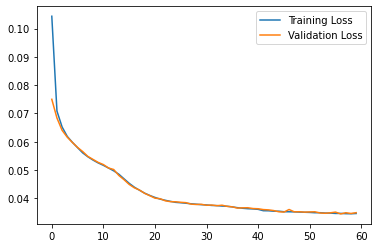

In [771]:
auto_fitted.history
plt.plot(auto_fitted.history["loss"], label="Training Loss")
plt.plot(auto_fitted.history["val_loss"], label="Validation Loss")
plt.legend()

<AxesSubplot:xlabel='ReconstructionError', ylabel='Count'>

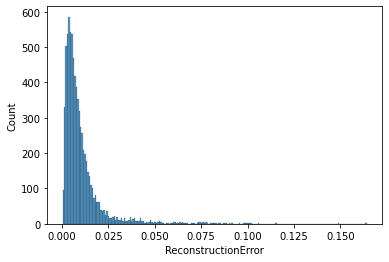

In [772]:
#Training errors
sns.histplot(data=rec_errTrain, x='ReconstructionError')
#the data is already quite skewed - the reconstruction error on the training set itself has many different values. 


<AxesSubplot:xlabel='ReconstructionError', ylabel='Count'>

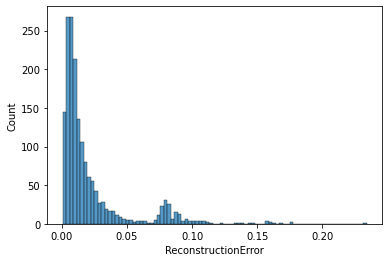

In [773]:
#Validation errors
sns.histplot(data=rec_errValid, x='ReconstructionError')
#We can use these values to decide a threshold to classify validation set predictions. (values beyond 0.06 have much fewer falues)


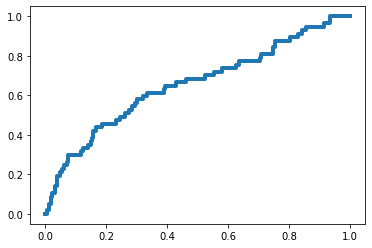

0.6547611434418366

In [774]:
#validaiton reconstruction errors and histogram 
auto_validPreds = autoencoder.predict(X_validAuto_df)
mse_validation = np.mean((auto_validPreds-X_validAuto_df)**2, axis=1)
rec_errValid = pd.DataFrame({'ReconstructionError':mse_validation, 'TrueClass':y_valid_auto })
#Validation ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_valid_auto,mse_validation)
plt.plot(fpr, tpr, linewidth=4)
plt.show()
roc_auc_score(y_valid_auto,mse_validation) #AUC of validation set 

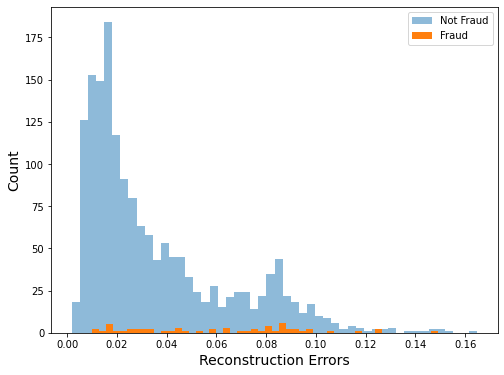

In [775]:
#Test reconstruction
auto_testPreds = autoencoder.predict(X_testAuto_df)
mse_test=np.mean((auto_testPreds-X_testAuto_df)**2, axis=1)
rec_errTest = pd.DataFrame({'ReconstructionError':mse_test, 'TrueClass':y_test_auto })
test_err_notFraud=rec_errTest[rec_errTest['TrueClass']==0]
test_err_Fraud=rec_errTest[rec_errTest['TrueClass']==1]
plt.figure(figsize=(8,6))
plt.hist(test_err_notFraud['ReconstructionError'], bins=50, alpha=0.5, label='Not Fraud')
plt.hist(test_err_Fraud['ReconstructionError'], bins=50, label='Fraud')
plt.xlabel("Reconstruction Errors", size=14)
plt.ylabel("Count", size=14)
plt.legend(loc='upper right')


In [776]:
#He optimisaiton (for relu) and Glorot (for sigmoid) deteriorated the AUC and the losses were also higher this time.
#Early stopping improved definitely helped in stopping training when there was not much significant improvement in losses for 15 epochs.
#Dropout is not adding much value - making training loss < validation loss. This seemed very surprising hence all nodes seem important for learning.

#### Adding activity regulariser 

In [777]:
tf.keras.backend.clear_session()
np.random.seed(672)
tf.random.set_seed(323)

reg_param = 0.00038
regularizer = tf.keras.regularizers.l2(reg_param)

#encoder
encoder = tf.keras.Sequential([
    tf.keras.layers.Dense(11, activation='relu',input_shape=(14,), activity_regularizer=regularizer, kernel_initializer="he_normal"),
    tf.keras.layers.Dense(8, activation="relu", activity_regularizer=regularizer),
    tf.keras.layers.Dense(5, activation="relu",activity_regularizer=regularizer),
    tf.keras.layers.Dense(2, activation="relu",activity_regularizer=regularizer)
    ])
#decoder
decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='relu',input_shape=(2,), activity_regularizer=regularizer),
    tf.keras.layers.Dense(8, activation="relu", activity_regularizer=regularizer),
    tf.keras.layers.Dense(11, activation="relu", activity_regularizer=regularizer),
    tf.keras.layers.Dense(14, activation="sigmoid", activity_regularizer=regularizer, kernel_initializer="glorot_normal")
 ])

#adding callbacks
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True, min_delta=0.001)


#Kernel regularizer makes the loss static after some epochs and no further learning happens - training and validation losses look like flat lines. 
# Tried both l1 and l2.
#Trying activity regularizer - improvement using l2 better than l1. Tried different parameters in the regulariser such as 0.0001, 0.0004, 0.001, 0.005. The best outcome was with 0.00045.
#Also tried using kernel initialiser in combination. The better results were with activity regularizer and kernel initializers for an AUC of 73%. 
#The outputs were needed to be smaller hence the activity regularization seemed more useful than kernel regularizer to limit overfitting. 
#The weights initializer was already taking care of making the weights consistently sized. 

autoencoder = tf.keras.Sequential([encoder,decoder])
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
auto_fitted=autoencoder.fit(x=X_trainAuto_df, y=X_trainAuto_df,
                epochs=150,
                validation_data=(X_validAuto_df, X_validAuto_df),
                callbacks=[early_stopping_cb])



Epoch 1/150
241/241 [==============================] - 1s 2ms/step - loss: 0.1144 - val_loss: 0.0859
Epoch 2/150
241/241 [==============================] - 0s 1ms/step - loss: 0.0809 - val_loss: 0.0775
Epoch 3/150
241/241 [==============================] - 0s 1ms/step - loss: 0.0736 - val_loss: 0.0713
Epoch 4/150
241/241 [==============================] - 0s 904us/step - loss: 0.0687 - val_loss: 0.0677
Epoch 5/150
241/241 [==============================] - 0s 956us/step - loss: 0.0659 - val_loss: 0.0656
Epoch 6/150
241/241 [==============================] - 0s 1ms/step - loss: 0.0641 - val_loss: 0.0642
Epoch 7/150
241/241 [==============================] - 0s 1ms/step - loss: 0.0629 - val_loss: 0.0632
Epoch 8/150
241/241 [==============================] - 0s 1ms/step - loss: 0.0619 - val_loss: 0.0623
Epoch 9/150
241/241 [==============================] - 0s 1ms/step - loss: 0.0611 - val_loss: 0.0615
Epoch 10/150
241/241 [==============================] - 0s 941us/step - loss: 0.0603 - 

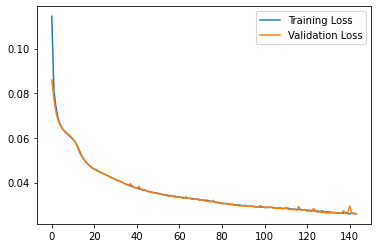

In [778]:
auto_fitted.history
plt.plot(auto_fitted.history["loss"], label="Training Loss")
plt.plot(auto_fitted.history["val_loss"], label="Validation Loss")
plt.legend()

### Q7: Validation errors histogram

<AxesSubplot:xlabel='ReconstructionError', ylabel='Count'>

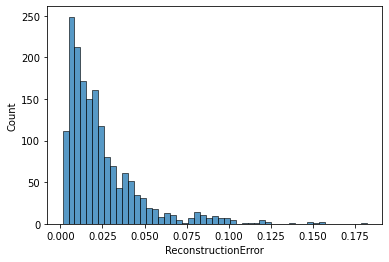

In [779]:
#validaiton reconstruction errors and histogram 
auto_validPreds = autoencoder.predict(X_validAuto_df)
mse_validation = np.mean((auto_validPreds-X_validAuto_df)**2, axis=1)
rec_errValid = pd.DataFrame({'ReconstructionError':mse_validation, 'TrueClass':y_valid_auto })
sns.histplot(data=rec_errValid, x='ReconstructionError')
#Validation set histogram

The histogram shows all the validation set reconstruction errors. Ideally, the points skewing towards the far right must comprise of anomolous data.

### Q8: Histogram of test set reconstruction errors with actual Fraud and Non Fraud claims

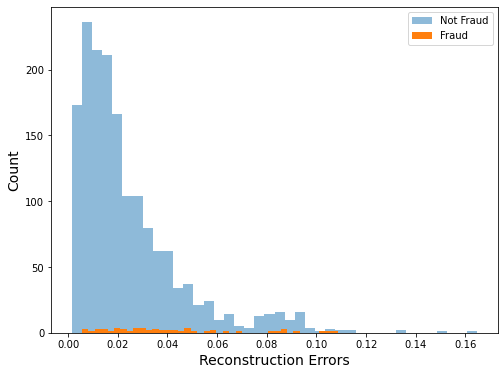

In [780]:
#Test reconstruction
auto_testPreds = autoencoder.predict(X_testAuto_df)
mse_test=np.mean((auto_testPreds-X_testAuto_df)**2, axis=1)
rec_errTest = pd.DataFrame({'ReconstructionError':mse_test, 'TrueClass':y_test_auto })
test_err_notFraud=rec_errTest[rec_errTest['TrueClass']==0]
test_err_Fraud=rec_errTest[rec_errTest['TrueClass']==1]
plt.figure(figsize=(8,6))
plt.hist(test_err_notFraud['ReconstructionError'], bins=40, alpha=0.5, label='Not Fraud')
plt.hist(test_err_Fraud['ReconstructionError'], bins=40, label='Fraud')
plt.xlabel("Reconstruction Errors", size=14)
plt.ylabel("Count", size=14)
plt.legend(loc='upper right')

### A transaction is fraudulent if the reconstruction errors higher because the autoencoder has only been trained with non fraud features. If the features to predict are fraud features then there will be something unusual about them - this is something the autoencoder should find difficult to recreate and hence cause higher errors.

The orange bars (Fraud) have moved further to the right as well as the blue bars. The changes in the autoencoder have been in the correct direction as seen in the histogram anf AUC, however, the losses have increased overall as well. The autoencoder is still unable to seggregate the two categories that well as seen in the reconstruction errors. The model has a lot of room for improvement 
unless the Fraud transactions have been done very meticulously to appear normal.

This is the final autoencoder (16,12,8,5,2,5,8,12,16) with the early stopper, kernel initializer, and activity regularizer.


AUC can be derived by using reconstruction errors and using that to choose a threshold above which all observations will be classified as fraudulent. 
The reconstruction error of an autoencoder for anomolous data should be much higher than the normal data because the autoencoder has been trained to observe the nuances in the normal data. Any detterance from normal should make it difficult for the autoencoder to reproduce. 
Keeping this in mind, the distribution of the errors of the training set can help identify a point beyond which any error can be considered an anomaly. 

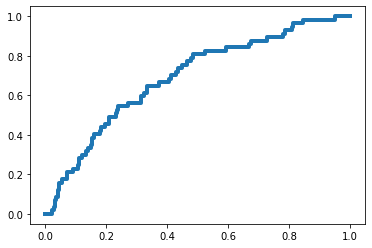

0.690776150583019

In [781]:
auto_validPreds = autoencoder.predict(X_validAuto_df)
mse_validation = np.mean((auto_validPreds-X_validAuto_df)**2, axis=1)
rec_errValid = pd.DataFrame({'ReconstructionError':mse_validation, 'TrueClass':y_valid_auto })
#Validation ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_valid_auto,mse_validation)
plt.plot(fpr, tpr, linewidth=4)
plt.show()
roc_auc_score(y_valid_auto,mse_validation) #AUC of validation set 

The AUC here is 0.73. The performance in terms of AUC is worse than the other models. After trying different autoencoder variations, a better AUC did not necessarily mean the losses would also be better. The training and validation losses of other models were much lower but their AUC's were not better. The validation loss obviously cannot be exactly the same especially in this case where validation set also contains anomalous data. 
